<a href="https://colab.research.google.com/github/NavdeepSingh27/NLP_ASSIGNMENT/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Part a & e: Plotting Co-occurrence Word Embeddings ---


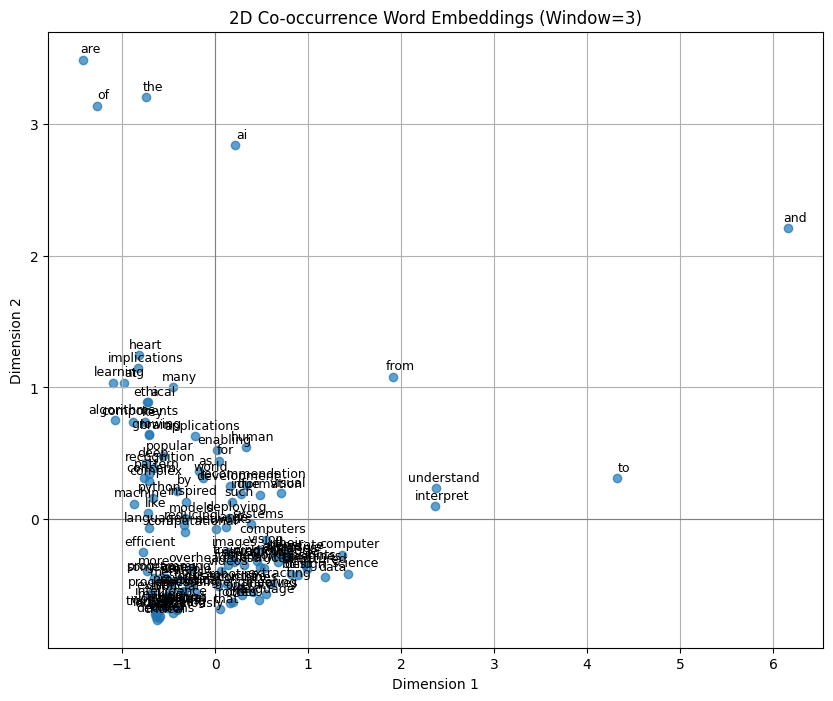

Shape of 2-dimensional embeddings: (121, 2)
First 5 embeddings:
[[-0.73305317  0.88784245]
 [ 0.20896217  2.83727161]
 [-1.0813859   0.75301895]
 [ 0.64626486 -0.27971356]
 [ 0.48095223 -0.36516484]]

--- Part b: Distinct Words ---
Distinct words in the corpus: ['a', 'ai', 'algorithms', 'allows', 'analytics', 'and', 'applications', 'are', 'artificial', 'as', 'at', 'autonomously', 'bias', 'brain', 'build', 'by', 'can', 'cloud', 'combines', 'complex', 'components', 'computational', 'computer', 'computers', 'computing', 'concern', 'critical', 'data', 'decisions', 'deep', 'deploying', 'design', 'development', 'due', 'efficient', 'enabling', 'engineering', 'ethical', 'exhibit', 'extensive', 'extracting', 'focuses', 'for', 'frameworks', 'from', 'generate', 'growing', 'heart', 'human', 'images', 'implications', 'industries', 'information', 'infrastructure', 'insights', 'inspired', 'intelligence', 'interpret', 'involves', 'is', 'key', 'knowledge', 'language', 'languages', 'large', 'learning', 

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Using PCA for dimensionality reduction, as SVD is a part of it.
import re
# Removed: import os # Removed the os module as file operations are no longer needed

def get_distinct_words(corpus):
    """
    Method to work out the distinct words (word types) that occur in the corpus.

    Args:
        corpus (list of str): A list of sentences or a single string forming the corpus.

    Returns:
        list: A sorted list of unique words (word types) found in the corpus.
    """
    # Join the corpus into a single string if it's a list of sentences
    if isinstance(corpus, list):
        text = " ".join(corpus)
    else:
        text = corpus

    # Convert to lowercase and split into words, removing punctuation
    words = re.findall(r'\b\w+\b', text.lower())
    distinct_words = sorted(list(set(words)))
    return distinct_words

def construct_co_occurrence_matrix(corpus, window_size=4):
    """
    Constructs a co-occurrence matrix for a certain window-size n.
    Considers words n before and n after the word in the center of the window.

    Args:
        corpus (list of str): A list of sentences or a single string forming the corpus.
        window_size (int): The number of words to consider before and after the center word.

    Returns:
        tuple: A tuple containing:
            - np.array: The co-occurrence matrix.
            - list: A sorted list of distinct words corresponding to the matrix rows/columns.
    """
    # Join the corpus into a single string if it's a list of sentences
    if isinstance(corpus, list):
        text = " ".join(corpus)
    else:
        text = corpus

    words = re.findall(r'\b\w+\b', text.lower())
    distinct_words = get_distinct_words(corpus)
    word_to_idx = {word: i for i, word in enumerate(distinct_words)}
    vocab_size = len(distinct_words)

    co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)

    for i, center_word in enumerate(words):
        if center_word not in word_to_idx:
            continue # Skip words not in our distinct list (e.g., if re.findall missed something)

        center_word_idx = word_to_idx[center_word]

        # Iterate through the window around the center word
        for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
            if i == j: # Skip the center word itself
                continue

            context_word = words[j]
            if context_word in word_to_idx:
                context_word_idx = word_to_idx[context_word]
                co_occurrence_matrix[center_word_idx, context_word_idx] += 1

    return co_occurrence_matrix, distinct_words

def perform_dimensionality_reduction(matrix, k_dimensions=2):
    """
    Performs dimensionality reduction on the matrix to produce k-dimensional embeddings.
    Uses PCA (Principal Component Analysis) which is based on SVD.

    Args:
        matrix (np.array): The input co-occurrence matrix.
        k_dimensions (int): The desired number of dimensions for the embeddings.

    Returns:
        np.array: The k-dimensional word embeddings.
    """
    if matrix.shape[0] == 0 or matrix.shape[1] == 0:
        print("Warning: Input matrix is empty or has zero features. Cannot perform PCA.")
        return np.array([])

    # Ensure n_components <= min(n_samples, n_features)
    n_components = min(k_dimensions, matrix.shape[0], matrix.shape[1])
    if n_components <= 0:
        print("Warning: Not enough components to perform PCA. Returning empty array.")
        return np.array([])

    if k_dimensions > min(matrix.shape):
        print(f"Warning: k_dimensions ({k_dimensions}) is greater than the smaller dimension of the matrix ({min(matrix.shape)}). "
              f"Reducing k_dimensions to {min(matrix.shape)}.")
        k_dimensions = min(matrix.shape)

    pca = PCA(n_components=k_dimensions)
    embeddings = pca.fit_transform(matrix)
    return embeddings


def plot_vectors_2d(vectors, word_labels, title="2D Word Embeddings"):
    """
    Function to plot a set of 2D vectors in 2D space.

    Args:
        vectors (np.array): A numpy array where each row is a 2D vector.
        word_labels (list): A list of strings, corresponding to the labels for each vector.
        title (str): The title for the plot.
    """
    if len(vectors) == 0:
        print("No vectors to plot.")
        return

    if vectors.shape[1] != 2:
        raise ValueError("Vectors must be 2-dimensional for this plotting function.")



    plt.figure(figsize=(10, 8))
    plt.scatter(vectors[:, 0], vectors[:, 1], alpha=0.7)

    for i, word in enumerate(word_labels):
        plt.annotate(word, (vectors[i, 0], vectors[i, 1]),
                     textcoords="offset points", xytext=(5, 5), ha='center', fontsize=9)

    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.show()

# --- Main execution ---
if __name__ == "__main__":
    # Updated default hardcoded corpus data - focusing on a different set of concepts
    corpus_data = [
        "Artificial intelligence is transforming industries worldwide, making processes more efficient.",
        "Machine learning algorithms are at the heart of many AI applications, from recommendation systems to predictive analytics.",
        "Data science involves extracting knowledge and insights from structured and unstructured data, often using statistical methods.",
        "Programming languages like Python are popular for AI development due to their extensive libraries and frameworks.",
        "Neural networks, inspired by the human brain, are key components of deep learning, enabling complex pattern recognition.",
        "The ethical implications of AI are a growing concern, as algorithms can sometimes exhibit bias or make critical decisions.",
        "Cloud computing provides scalable infrastructure for training and deploying large AI models, reducing computational overhead.",
        "Robotics combines engineering and computer science to design, build, and operate robots that can perform tasks autonomously.",
        "Natural language processing focuses on enabling computers to understand, interpret, and generate human language.",
        "Computer vision allows machines to interpret and understand visual information from the world, such as images and videos."
    ]

    if not corpus_data:
        print("Error: Corpus data is empty. Cannot proceed with analysis.")
    else:
        # Reordered output as requested: a & e first, then b, c, d

        # Pre-compute necessary components for plotting
        distinct_words_list = get_distinct_words(corpus_data)
        co_matrix, vocab = construct_co_occurrence_matrix(corpus_data, window_size=3)
        k_dim = 2 # For plotting in 2D
        embeddings = perform_dimensionality_reduction(co_matrix, k_dimensions=k_dim)

        print("--- Part a & e: Plotting Co-occurrence Word Embeddings ---")
        # Plotting the 2D word embeddings
        # Ensure there are enough words to plot and k_dim is 2
        if k_dim == 2 and len(vocab) >= 2 and embeddings.shape[0] > 0:
            plot_vectors_2d(embeddings, vocab, title=f"2D Co-occurrence Word Embeddings (Window={3})")
        else:
            print("Cannot plot 2D embeddings. Either k_dimensions is not 2, there are not enough distinct words, or no embeddings were generated.")
        print(f"Shape of {k_dim}-dimensional embeddings: {embeddings.shape}")
        if embeddings.size > 0:
            print(f"First 5 embeddings:\n{embeddings[:5]}\n")
        else:
            print("No embeddings to display.\n")

        print("--- Part b: Distinct Words ---")
        print(f"Distinct words in the corpus: {distinct_words_list}")
        print(f"Number of distinct words: {len(distinct_words_list)}\n")

        print("--- Part c: Co-occurrence Matrix Construction ---")
        window_size = 3 # The window size used for constructing the matrix
        print(f"Co-occurrence Matrix (window size = {window_size}):\n{co_matrix}\n")
        print(f"Vocabulary for matrix: {vocab}\n")

        print("--- Part d: Dimensionality Reduction for k-dimensional embeddings ---")
        # This part's output is mostly covered under "Part a & e" now, but explicitly showing shape/first few.
        print(f"Shape of {k_dim}-dimensional embeddings: {embeddings.shape}")
        if embeddings.size > 0:
            print(f"First 5 embeddings:\n{embeddings[:5]}\n")
        else:
            print("No embeddings to display.\n")
